## Курсовой проект по курсу "Методы, средства и технологии мультимедиа"

Выполнил студент группы М8О-408Б-19 Шавандрин Фёдор

### Задание

1. Выбрать задачу (классификация или регрессия)
2. Выбрать датасет
3. Сделать описание датасета
4. Сделать и описать предпроцессинг над датасетом
5. Выбрать алгоритм
6. Реализовать алгоритм
7. Сделать описание алгоритма
8. Выбрать метрики качества
9. Продемонстрировать полученные результаты
10. Сравнить результат вашего алгоритма с алгоритмом из sklearn
11. Выводы

In [1]:
# импортируем необходимые для работы библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### Задача и датасет
Задача состоит в том, чтобы предсказать, какие люди бы выжили при затоплении Титаника. Несмотря на то, что чтобы пережить затопление, был определенный элемент везения, у некоторых групп людей было больше шансов выжить, чем у других, например, у женщин, детей и представителей высшего класса. Эта задача классификации.

### Описание датасета
Посмотрим, из чего состоит датасет, и проанализируем фичи.

In [2]:
data_raw = pd.read_csv('./train.csv')

In [3]:
data_val  = pd.read_csv('./test.csv')

In [4]:
data1 = data_raw.copy(deep = True)

In [5]:
data_cleaner = [data1, data_val]

In [6]:
print (data_raw.info())
data_raw.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
771,772,0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,NaN,S
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.0000,NaN,S
260,261,0,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.7500,NaN,Q
776,777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.7500,F38,Q
653,654,1,3,"O'Leary, Miss. Hanora ""Norah""",female,NaN,0,0,330919,7.8292,NaN,Q
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
812,813,0,2,"Slemen, Mr. Richard James",male,35.0,0,0,28206,10.5000,NaN,S
611,612,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S
552,553,0,3,"O'Brien, Mr. Timothy",male,NaN,0,0,330979,7.8292,NaN,Q
315,316,1,3,"Nilsson, Miss. Helmina Josefina",female,26.0,0,0,347470,7.8542,NaN,S


#### Переменные:
1. Переменная *Survived* - это наш таргет - номинальный тип данных, равный 1 для вышивших и 0 для не выживших. Все остальные переменные явлются потенциальными предикторами или независимыми переменными.
2. Переменные *PassengerID* *Ticket* не оказывают влияния на наш таргет, так как являются случайными уникальными идентификаторами. Поэтому они будут исключены из анализа.
3. Переменная *Pclass* - это порядковый тип данных для класса билета, показатель социально-экономического статуса, где 1 = высший класс, 2 = средний класс и 3 = низший класс.
4. Переменная *Name* имеет номинальный тип данных и может быть использована для получения пола из титула (*Mr* или *Miss*) или социально-экономического статуса из таких названий, как *doctor* или *master*. Так как такие переменные уже существуют в нашем датасете, будем использовать именно их.
5. Переменные *Sex* и *Embarked* - это номинальный тип данных. Они будут преобразованы в фиктивные переменные для математических вычислений.
6. Переменные *Age* и *Fare* являются непрерывными, имеют количественный тип данных.
7. Переменная *SibSp* отвечает за количество братьев и сестер / супругов на борту, переменная *Parch* описывает количество родителей и детей на борту. Обе переменные явлются дискретными величинами и имеют количественный тип данных.
8. Переменная *Cabin* имеет номинальный тип данных, которая может использоваться для определения приблизительного положения на судне, когда произошел инцидент, и социально-экономического статуса, исходя из уровней палубы. Однако, поскольку существует много нулевых значений, данная фича не имеет никакой ценности, и поэтому она тоже будет исключена из анализа.

### Предпроцессинг над датасетом
Предпроцессинг над датасетом будет проходить в 3 этапа:
- заполнение недостающей информации
- создание новых фичей для анализа
- преобразование данных в правильный формат для расчётов и визуализации

#### Заполнение недостающей информации

В полях *Age*, *Cabin* и *Embarked* имеются нулевые значения или данные вовсе отсутствуют. Отсутствие данных - это очень плохо. Конечно, мы можем удалить недостающие данные, однако лучше их заполнить, используя разумные входные данные. Для этого датасета возраст будет вычислен с помощью медианы, атрибут *Cabin* будет удален, а *Embarked* будет вычислен с помощью mode.

In [7]:
for dataset in data_cleaner:    
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
drop_column = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace = True)

print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


#### Cоздание новых фичей для анализа
Создание новых фичей позволяет нам определить, дают ли они новые сигналы для прогнозирования нашего результата. Создадим новый признак *Title*, чтобы определить, сыграл ли данный признак какую-то роль в выживании.

In [8]:
for dataset in data_cleaner:
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1 # 1 если пассижир был один
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

#cleanup rare title names
stat_min = 10
title_names = (data1['Title'].value_counts() < stat_min)

data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print("-"*10)

#preview data again
data1.info()
data_val.info()
data1.sample(10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.9+ KB
<class 'pandas.core.frame.DataFrame'>
Ra

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
822,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,0.0000,S,1,1,Misc,"(-0.001, 7.91]","(32.0, 48.0]"
15,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,16.0000,S,1,1,Mrs,"(14.454, 31.0]","(48.0, 64.0]"
677,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,9.8417,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
476,0,2,"Renouf, Mr. Peter Henry",male,34.0,1,0,21.0000,S,2,0,Mr,"(14.454, 31.0]","(32.0, 48.0]"
576,1,2,"Garside, Miss. Ethel",female,34.0,0,0,13.0000,S,1,1,Miss,"(7.91, 14.454]","(32.0, 48.0]"
393,1,1,"Newell, Miss. Marjorie",female,23.0,1,0,113.2750,C,2,0,Miss,"(31.0, 512.329]","(16.0, 32.0]"
112,0,3,"Barton, Mr. David John",male,22.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
801,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,26.2500,S,3,0,Mrs,"(14.454, 31.0]","(16.0, 32.0]"
395,0,3,"Johansson, Mr. Erik",male,22.0,0,0,7.7958,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
508,0,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,22.5250,S,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]"


#### Преобразование данных в правильный формат
Для данного датасета преобразуем объектные типы данных в категориальные фиктивные переменные. Буду использовать *LabelEncoder* из библиотеки *sklearn*.

In [9]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

Target = ['Survived']
data1_columns = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']

#### Результат предпроцессинга

In [10]:
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*10)
print (data1.info())
print("-"*10)

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked       891 no

В результате предпроцессинга избавились от null значений, а также дополнили недостающие данные. Создали новый признак и преобразовали данные в нужный тип.

Изучим наши данные с помощью описательной и графической статистики для описания и обобщения наших переменных. Определим их корреляцию с целевой переменной и друг с другом.

In [11]:
# Корреляция дискретных признаков с таргетом
for x in data1_columns:
    if data1[x].dtype != 'float64' :
        print(f'Корреляция переменной "{x}" с целевой переменной "Target"')
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')

Корреляция переменной "Sex_Code" с целевой переменной "Target"
   Sex_Code  Survived
0         0  0.742038
1         1  0.188908
---------- 

Корреляция переменной "Pclass" с целевой переменной "Target"
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Корреляция переменной "Embarked_Code" с целевой переменной "Target"
   Embarked_Code  Survived
0              0  0.553571
1              1  0.389610
2              2  0.339009
---------- 

Корреляция переменной "Title_Code" с целевой переменной "Target"
   Title_Code  Survived
0           0  0.575000
1           1  0.444444
2           2  0.697802
3           3  0.156673
4           4  0.792000
---------- 

Корреляция переменной "FamilySize" с целевой переменной "Target"
   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          1

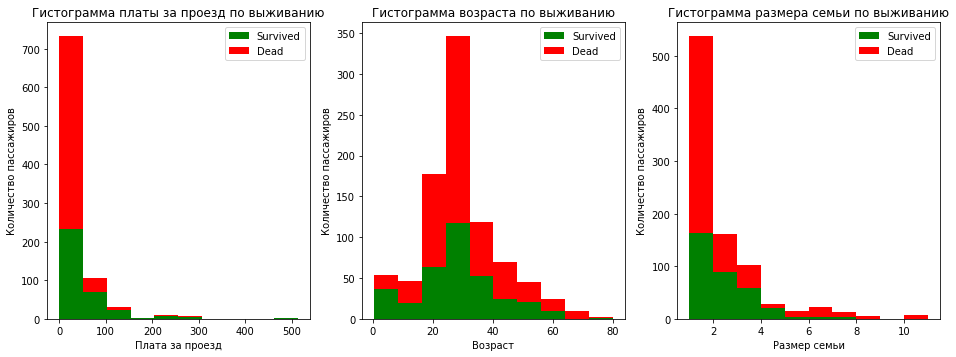

In [12]:
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Гистограмма платы за проезд по выживанию')
plt.xlabel('Плата за проезд')
plt.ylabel('Количество пассажиров')
plt.legend()

plt.subplot(232)
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Гистограмма возраста по выживанию')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.legend()

plt.subplot(233)
plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Гистограмма размера семьи по выживанию')
plt.xlabel('Размер семьи')
plt.ylabel('Количество пассажиров')
plt.legend()

Из первой гистограммы видно, что большая часть пассажиров, которая погибла, заплатили за проезд маленькую цену.  
Из второй гистограммы видно, что большая часть пассажиров погибло в возрасте от 25 до 30 лет.  
Из третьей гистограммы видно, что большая часть пассажиров, которая погибла, путешествовали на Титанике в одиночку .  

<AxesSubplot:xlabel='IsAlone', ylabel='Survived'>

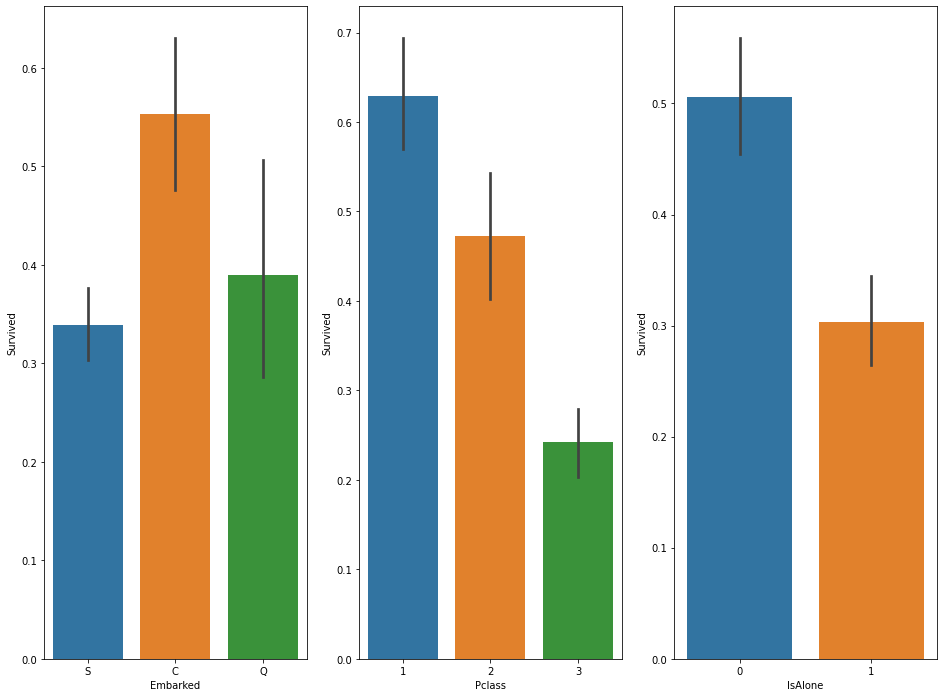

In [13]:
fig, saxis = plt.subplots(1, 3,figsize=(16,12))

sns.barplot(x = 'Embarked', y = 'Survived', data=data1, ax = saxis[0])
sns.barplot(x = 'Pclass', y = 'Survived', data=data1, ax = saxis[1])
sns.barplot(x = 'IsAlone', y = 'Survived', data=data1, ax = saxis[2])

По данным графикам можно сделать следующие выводы:
- Большая часть выживших должна была прибыть в порт посадки *C*
- Из всех вышивших пассажиров большую часть составляют представители высшего класса, а также те, кто плыл на Титанике со своей семьей

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

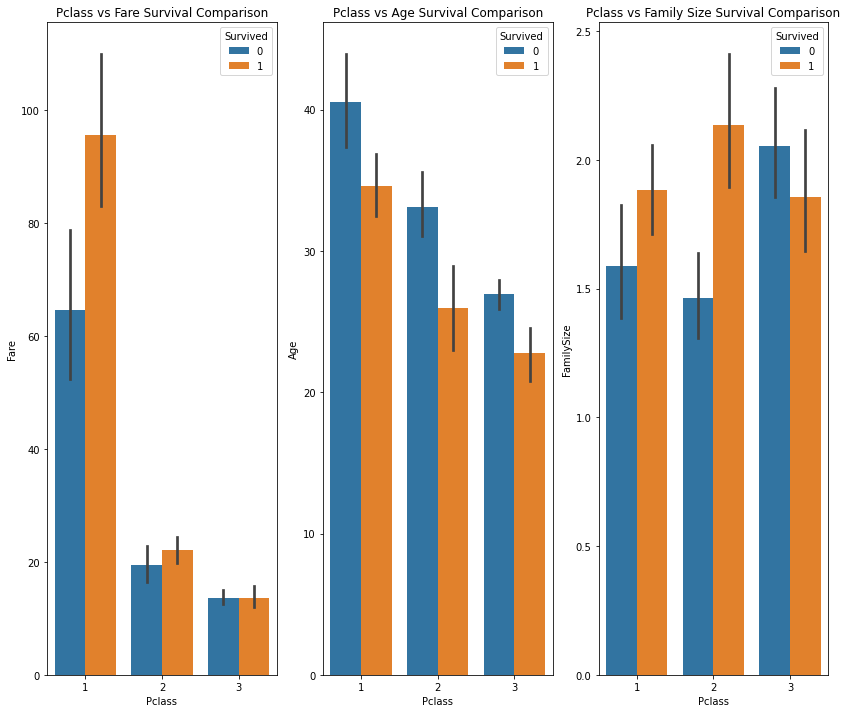

In [14]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.barplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.barplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = data1, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

Из этих графиков следует, что:
- Представители высшего класса, купившие дорогие билеты, выжили
- Больше всего погибло людей из высшего класса в возрасте 40 лет, а больше всего выжило также представителей 1 класса в возрасте 35 лет
- Большая часть людей среднего класса, которые ехали вдвоём, выжила 

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

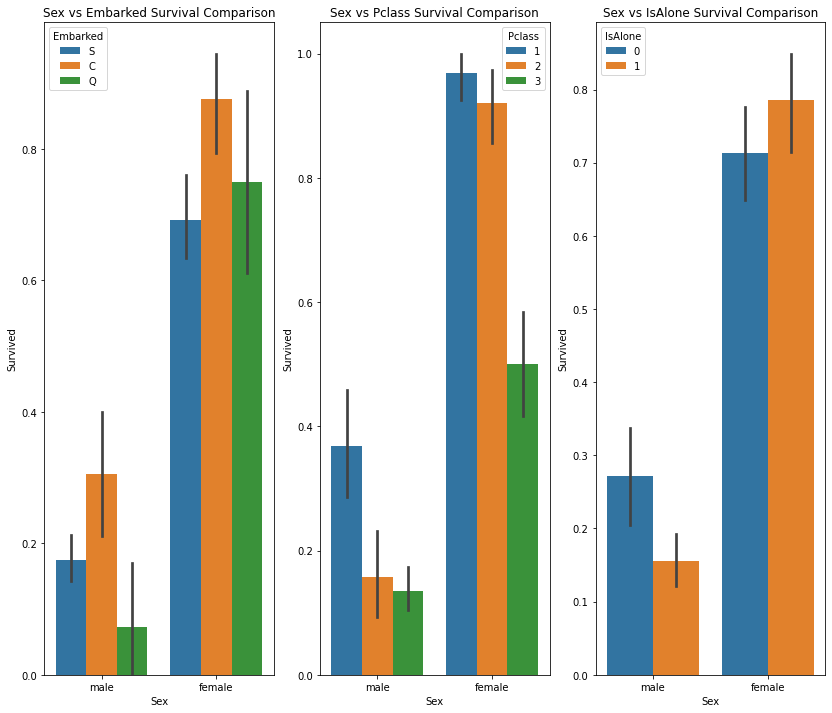

In [15]:
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data1, ax = qaxis[0])
qaxis[0].set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data1, ax  = qaxis[1])
qaxis[1].set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=data1, ax  = qaxis[2])
qaxis[2].set_title('Sex vs IsAlone Survival Comparison')

Из графиков видно, что большая часть женщин, которая выжила, являются представителями среднего класса, которые ехали в одиночку в порт посадки *C*.

 #### График распределения возраста пассажиров, которые выжили или не выжили

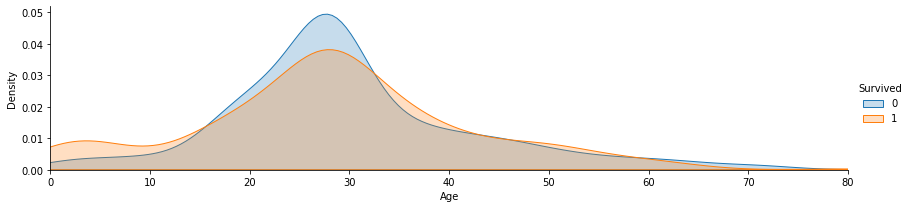

In [16]:
a = sns.FacetGrid( data1, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data1['Age'].max()))
a.add_legend()

Наибольшая вероятность выжить у людей в возрасте 27-28 лет.

#### Гистограмма сравнения возраста, класса и пола по выживанию

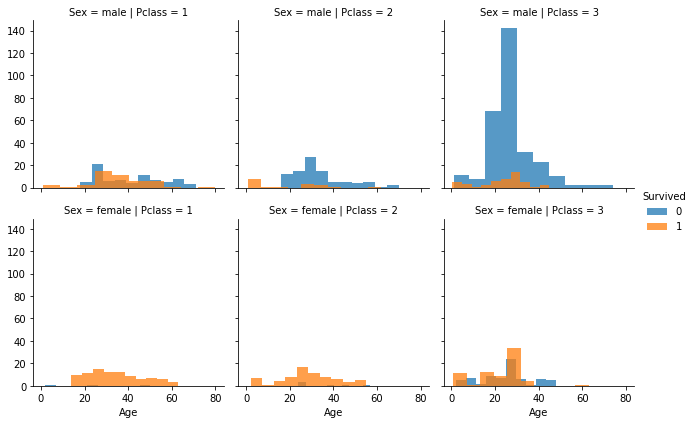

In [17]:
h = sns.FacetGrid(data1, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

 Из гистограмм выше можно сделать вывод о том, что больше всего погибло мужчин 3 класса в возрасте от 21 до 23-24 лет.

In [18]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

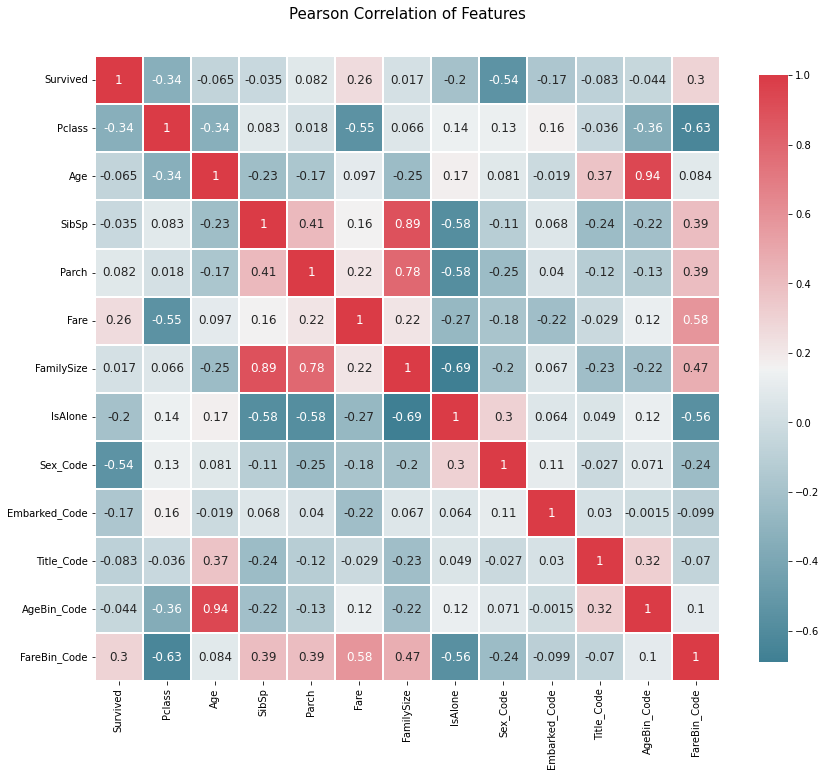

In [19]:
correlation_heatmap(data1)

### Обучающая и тестовая выборка

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data1[data1_columns], data1[Target], test_size=0.2)

In [21]:
X_train.shape, X_test.shape

((712, 7), (179, 7))

### Реализация алгоритма SVM и обучение

Основан на нахождении наиболее правильной линии или гиперплоскости, разделяющую данные на два класса.

In [22]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted, check_array
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import GridSearchCV

In [23]:
class My_svm(ClassifierMixin, BaseEstimator):
    def __init__(self, epochs=10, lr=0.1, alpha=0.1):
        self.w = None
        self.epochs = epochs
        self.lr = lr
        self.alpha = alpha
    
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        y = np.where(y == 1, 1, -1)
        n, k = X.shape
        
        if self.w is None:
            np.random.seed(66)
            self.w = np.random.randn(k + 1)

        X = np.concatenate((np.ones((n, 1)), X), axis=1)
        for i in range(self.epochs):
            for j, x in enumerate(X):
                margin = y[j] * np.dot(self.w, x)
                if margin >= 1:
                    self.w -= self.lr * self.alpha * self.w / self.epochs
                else:
                    self.w += self.lr * (y[j] * x - self.alpha * self.w / self.epochs)
        return self
    
    def predict(self, X):
        X = check_array(X)
        n, k = X.shape
        X = np.concatenate((np.ones((n, 1)), X), axis=1)
        y = np.ndarray((n))
        
        for i, elem in enumerate(X):
            prediction = np.dot(self.w, elem)
            if prediction > 0:
                y[i] = 1
            else:
                y[i] = 0
        return y
    
    
    def _hinge_loss(self, x, y):
        return max(0, 1 - y * np.dot(x, self.w))
    
    
    def _soft_margin_loss(self, x, y):
        return self._hinge_loss(x, y) + self.alpha * np.dot(self.w, self.w)

In [24]:
model = My_svm(epochs=100, lr=0.001)

In [25]:
model = model.fit(X_train, y_train)

### Обучение модели из sklearn

In [35]:
from sklearn.svm import LinearSVC

sk_model = LinearSVC(C=10, loss='squared_hinge')

In [36]:
sk_model = sk_model.fit(X_train, y_train)

### Метрики качества
В качестве основных выберу следующие метрики:
- Accuracy
- Recall
- Precision
- Confusion matrix

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_recall_curve

import matplotlib.pyplot as plt

In [29]:
def get_metrics(model, X, y_true, threshold=0.5):
    
    y_pred = model.predict(X)
    
    print('Accuracy = ', accuracy_score(y_true, y_pred))
    print('Precision = ', precision_score(y_true, y_pred))
    print('Recall = ', recall_score(y_true, y_pred))
    print('Confusion matrix:')
    print(confusion_matrix(y_true, y_pred))

#### Метрики нашей модели

In [30]:
get_metrics(model, X_test, y_test)

Accuracy =  0.8044692737430168
Precision =  0.8
Recall =  0.7027027027027027
Confusion matrix:
[[92 13]
 [22 52]]


#### Метрики модели из sklearn

In [37]:
get_metrics(sk_model, X_test, y_test)

Accuracy =  0.7988826815642458
Precision =  0.7878787878787878
Recall =  0.7027027027027027
Confusion matrix:
[[91 14]
 [22 52]]


Получили почти одинаковые результаты, поэтому можно сделать вывод о том, что мой алгоритм реализован корректно.  

#### Результаты модели
- accuracy=0.8: 80% предсказаний модели являются правильными.
- precision=0.8: 80% единичек, предсказанных моделью, на самом деле являются единичками 
- recall=0.7: модель верно распознала 70% действительных единичек в нашем датасете.


### Выводы

В данном курсовом проекте решал задачу классификации: необходимо предсказать, какой человек бы выжил при затоплении Титаника. 

Данный курсовой проект состоит из следующих этапов:
- Описание датасета;
- Предпроцессинг над датасетом;
- Реализация выбранного алгоритма обучения и сравнение его с моделью из библиотеки *sklearn*;
- Подсчёт метрик.

По полученным результатам нашей модели можно сделать вывод о том, что реализация алгоритма SVM работает наравне с моделью из sklearn. Используемый алгоритм SVM достаточно хорошо справился с задачей классификации.  

На тестовой выборке получили precision=0.8